In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib import cm

In [2]:
Pk_dict = pickle.load(open('Pk_results_mmIME.p', 'rb'))

In [3]:
Pk_dict['cube_types']

['all_lines_Lagache',
 'all_lines_de_Looze',
 'CO10',
 'CO21',
 'CO32',
 'CO43',
 'CO54',
 'CO65',
 'CO76',
 'CO87',
 'CI21',
 'CI10']

In [4]:
#convert Keating data

ISN = np.array([1010, 390, 550]) #uK**2 Hz / sr
ISN_noise_only = np.array([770, 210, 210])

mean_nu = np.mean([84,115])
lam = 3.e5/mean_nu

uK_2_MJy_sr = 1.e-6 * 2 * 1.38e-23 * 1e20 /(lam*1.e-6)**2
print(uK_2_MJy_sr, lam)

ISN_Jy2_sr_1GHz = ISN * uK_2_MJy_sr**2 * 1.e12 / 1.e9

ISN_Jy2_sr_1GHz_noise_only = uK_2_MJy_sr**2 * 1.e12 / 1.e9 * ISN_noise_only

print(ISN_Jy2_sr_1GHz)

print(ISN_Jy2_sr_1GHz_noise_only)

print(uK_2_MJy_sr)
print(uK_2_MJy_sr**2 * 1.e12 / 1.e9)

0.00030360766666666676 3015.075376884422
[0.09309939 0.03594927 0.05069769]
[0.07097676 0.0193573  0.0193573 ]
0.00030360766666666676
9.217761525877784e-05


In [5]:
Cte = (1.e-6 * 2 * 1.38e-23 * 1e20 / (3.e5 * 1.e-6)**2)**2 * 1.e3
print(Cte)

9.404444444444447e-13


In [6]:
Cte * mean_nu**4

9.21776152587778e-05

In [7]:
mean_nu

99.5

All CO and [CI] transitions mean level =  0.05921649692183499 Jy2 / sr
CO(1-0) mean level =  0.019769316320635236 Jy2 / sr
CO(2-1) mean level =  0.011598683709560381 Jy2 / sr
CO(3-2) mean level =  0.006916058107090435 Jy2 / sr
CO(4-3) mean level =  0.01016728577273148 Jy2 / sr
CO(5-4) mean level =  0.005782582931338505 Jy2 / sr
CO(6-5) mean level =  0.0005093172879029396 Jy2 / sr
CO(7-6) mean level =  3.8136696831381174e-05 Jy2 / sr
CO(8-7) mean level =  3.769133919609856e-06 Jy2 / sr


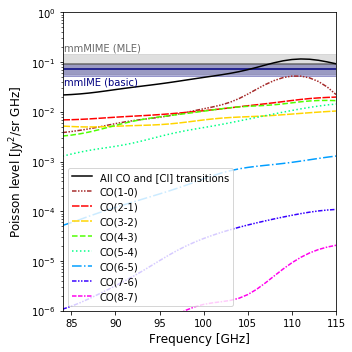

In [8]:
#PLOT CO relative contribution without masking

from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve

freq = np.arange(84,116) * u.GHz

index_poisson = np.where(np.abs(Pk_dict['kmean'].value -6) < 1)
indmin_poisson = np.min(index_poisson)
indmax_poisson = np.max(index_poisson)

index_ls = np.where(np.abs(Pk_dict['kmean'].value - 0.25) < 0.1)
indmin_ls = np.min(index_ls)
indmax_ls = np.max(index_ls)

colormap = cm.hsv

colors = ['black', 'brown']
colors.extend(list(colormap(np.arange(0,8)/7)))

linestyles = ['-', (0, (3,1,1,1,1,1,1,1)), (0, (5, 1, 5, 1)),(0, (5, 1, 5, 1)), '--', ':', '-.',
              (0, (3, 1, 1, 1, 1, 1 )),
              (0, (3, 1, 3, 1, 1, 1)), (0, (3, 1, 3, 1, 1, 1, 1, 1)), '..' ]

kernel = Gaussian1DKernel(stddev=3)

Poisson_list = []

for j in range(0,1):
    
    if j == 0:
        Pk_to_use = Pk_dict
        text_masking = ' (no masking)'
        str_masking = 'no_masking'
    else:
        Pk_to_use = Pk_dict_masked 
        text_masking = ' (with masking)'
        str_masking = 'with_masking'

    
    plt.figure(figsize=(5,5))
    
    for k in range(-1,8):
        
        if k == -1:
            cube_type = 'all_lines_de_Looze'
            cube_name = 'All CO and [CI] transitions'
        else:
            cube_type = 'CO{:0.0f}{:0.0f}'.format(k+1,k)
            cube_name = 'CO({:0.0f}-{:0.0f})'.format(k+1,k)
        
        level = np.mean(Pk_to_use['Pk_arr_'+cube_type][:, indmin_poisson:indmax_poisson], axis = 1)
            
        Poisson_list.append(np.mean(level.value))

                
        plt.plot(freq, convolve(level, kernel, boundary = 'extend'),
                     label = cube_name, color = colors[k+1], linestyle = linestyles[k+1])
            #plt.plot(freq, level,
                     #label = cube_name, color = colors[k+1], linestyle = linestyles[k+1])
    
        print(cube_name, 'mean level = ', np.mean(level))
    
    plt.yscale('log')
    plt.legend()
    plt.xlim([84,115])
    plt.ylim([1.e-6,1.])
    
    plt.xlabel('Frequency [GHz]', size = 12)
    plt.ylabel(r'Poisson level [Jy$^2$/sr GHz]', size = 12)           
            
    plt.plot([0.,200.], [ISN_Jy2_sr_1GHz[0], ISN_Jy2_sr_1GHz[0]], color = 'dimgrey', zorder = -1)
    plt.fill_between([0.,200.], [ISN_Jy2_sr_1GHz[0]-ISN_Jy2_sr_1GHz[1]], [ISN_Jy2_sr_1GHz[0]+ISN_Jy2_sr_1GHz[2]], color = 'silver', zorder = -1, alpha=0.5)
        
    plt.plot([0.,200.], [ISN_Jy2_sr_1GHz_noise_only[0], ISN_Jy2_sr_1GHz_noise_only[0]], color = 'navy', zorder = -1)
    plt.fill_between([0.,200.], [ISN_Jy2_sr_1GHz_noise_only[0]-ISN_Jy2_sr_1GHz_noise_only[1]], [ISN_Jy2_sr_1GHz_noise_only[0]+ISN_Jy2_sr_1GHz_noise_only[2]], color = 'navy', zorder = -1, alpha = 0.3)
            
    plt.text(84.2, 1.7e-1, 'mmMIME (MLE)', color = 'dimgrey')
        #plt.text(84.2, 3e-2, 'mmMIME', color = 'navy')
    plt.text(84.2, 3.5e-2, 'mmIME (basic)', color = 'navy')
        
    plt.tight_layout()
    plt.savefig('Pk_vs_freq_CO_mmIME.pdf', dpi = 150)

    plt.show()

In [9]:
#CI contribution
print('total = ', Poisson_list[0] - np.sum(Poisson_list[1:]))
print('percent = ', (Poisson_list[0] - np.sum(Poisson_list[1:]))/Poisson_list[0])

total =  0.004431346961825025
percent =  0.07483298054044543


In [10]:
#percentage of each CO transition
for k in range(1,9):
    print('percentage = ', Poisson_list[k] / Poisson_list[0])

percentage =  0.3338481225380569
percentage =  0.1958691295918854
percentage =  0.11679275989965333
percentage =  0.17169684633915722
percentage =  0.09765155373799703
percentage =  0.008600935792862448
percentage =  0.000644021494242071
percentage =  6.365006570018932e-05
